<a href="https://colab.research.google.com/github/Naomine14/--1/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%A7%D0%B5%D0%BA%D0%B0%D0%BD%D0%B8%D0%BD%D0%B0_%D0%98%D0%A232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_excel("data.xlsx", sheet_name='Data_base')
print(data.info())
print()
print(data.columns)
print()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер заказа                  116 non-null    int64         
 1   Канал продаж                  116 non-null    object        
 2   Продуктовый сегмент           116 non-null    object        
 3   Менеджер                      116 non-null    object        
 4   Название заказа               116 non-null    object        
 5   Продавец                      116 non-null    object        
 6   Город                         116 non-null    object        
 7   Продажи факт, тыс.руб         116 non-null    int64         
 8   Продажи план, тыс.руб         116 non-null    int64         
 9   Дата сделки                   116 non-null    datetime64[ns]
 10  Дата оплаты                   93 non-null     datetime64[ns]
 11  Дней между сделкой и оплатой  11

# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер заказа                  116 non-null    int64         
 1   Канал продаж                  116 non-null    object        
 2   Продуктовый сегмент           116 non-null    object        
 3   Менеджер                      116 non-null    object        
 4   Название заказа               116 non-null    object        
 5   Продавец                      116 non-null    object        
 6   Город                         116 non-null    object        
 7   Продажи факт, тыс.руб         116 non-null    int64         
 8   Продажи план, тыс.руб         116 non-null    int64         
 9   Дата сделки                   116 non-null    datetime64[ns]
 10  Дата оплаты                   93 non-null     datetime64[ns]
 11  Дней между сделкой и оплатой  11

Преобразуем столбцы 'Дата сделки' и 'Дата оплаты' в формат datetime.

Преобразуем столбцы 'Продажи факт, тыс.руб' и 'Продажи план, тыс.руб' в числовой формат для расчетов.

Преобразуем столбцы 'Дней между сделкой и оплатой' в числовой формат.

In [ ]:
data['Дата сделки'] = pd.to_datetime(data['Дата сделки'], errors='coerce')
data['Дата оплаты'] = pd.to_datetime(data['Дата оплаты'], errors='coerce')
data['Продажи факт, тыс.руб'] = pd.to_numeric(data['Продажи факт, тыс.руб'], errors='coerce')
data['Продажи план, тыс.руб'] = pd.to_numeric(data['Продажи план, тыс.руб'], errors='coerce')
data['Дней между сделкой и оплатой'] = pd.to_numeric(data['Дней между сделкой и оплатой'], errors='coerce')
print(data.dtypes)


Номер заказа                             int64
Канал продаж                            object
Продуктовый сегмент                     object
Менеджер                                object
Название заказа                         object
Продавец                                object
Город                                   object
Продажи факт, тыс.руб                    int64
Продажи план, тыс.руб                    int64
Дата сделки                     datetime64[ns]
Дата оплаты                     datetime64[ns]
Дней между сделкой и оплатой           float64
Статус                                  object
dtype: object


Обработка пропусков

Пропуски в столбцах 'Продажи факт, тыс.руб' и 'Продажи план, тыс.руб' заполним средними значениями, чтобы сохранить данные и тенденции.
Пропуски в столбцах 'Дата сделки' и 'Дата оплаты'удалим.

In [ ]:
print(data.isnull().sum())

# Обработка пропусков
# Заполнение пропусков в 'Продажи факт, тыс.руб' средним значением
if data['Продажи факт, тыс.руб'].isnull().any():
    mean_sales_fact = data['Продажи факт, тыс.руб'].mean()
    data['Продажи факт, тыс.руб'].fillna(mean_sales_fact, inplace=True)

# Заполнение пропусков в 'продажи план, тыс.руб' средним значением
if data['Продажи план, тыс.руб'].isnull().any():
    mean_sales_plan = data['Продажи план, тыс.руб'].mean()
    data['Продажи план, тыс.руб'].fillna(mean_sales_plan, inplace=True)

# Удаление строк с пропусками в 'дата сделки' и 'дата оплаты'
data.dropna(subset=['Дата сделки', 'Дата оплаты'], inplace=True)

# Проверка на наличие пропусков после обработки
print()
print(data.isnull().sum())


Номер заказа                     0
Канал продаж                     0
Продуктовый сегмент              0
Менеджер                         0
Название заказа                  0
Продавец                         0
Город                            0
Продажи факт, тыс.руб            0
Продажи план, тыс.руб            0
Дата сделки                      0
Дата оплаты                     23
Дней между сделкой и оплатой    23
Статус                           0
dtype: int64

Номер заказа                    0
Канал продаж                    0
Продуктовый сегмент             0
Менеджер                        0
Название заказа                 0
Продавец                        0
Город                           0
Продажи факт, тыс.руб           0
Продажи план, тыс.руб           0
Дата сделки                     0
Дата оплаты                     0
Дней между сделкой и оплатой    0
Статус                          0
dtype: int64


In [ ]:
# Подсчет суммарных фактических продаж по всем городам
data['Суммарные продажи'] = data.groupby('Город')['Продажи факт, тыс.руб'].transform('sum')

# Проверка результата
print(data[['Город', 'Продажи факт, тыс.руб', 'Суммарные продажи']].head())


             Город  Продажи факт, тыс.руб  Суммарные продажи
0  Санкт-Петербург                    300               1370
1  Санкт-Петербург                    450               1370
3  Санкт-Петербург                    500               1370
4     Магнитогорск                    100               7680
7         Оренбург                    250               2750


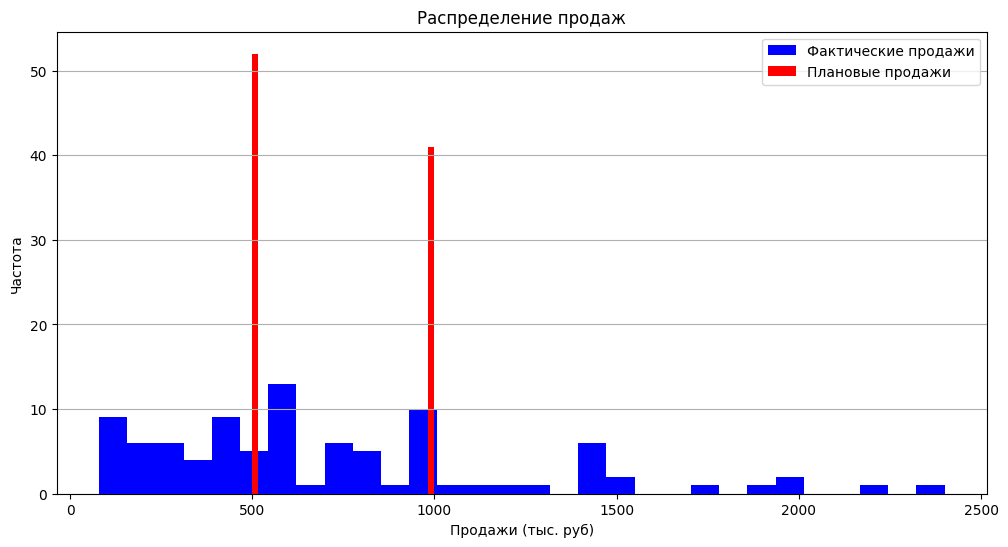

In [ ]:

plt.figure(figsize=(12, 6))
# Гистограмма фактических продаж
plt.hist(data['Продажи факт, тыс.руб'], bins=30, alpha=1, color='Blue', label='Фактические продажи')
# Гистограмма плановых продаж
plt.hist(data['Продажи план, тыс.руб'], bins=30, alpha=1, color='Red', label='Плановые продажи')

plt.legend()
plt.title('Распределение продаж')
plt.xlabel('Продажи (тыс. руб)')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()



По графику видно, что планы по продажам явно выше фактических продаж. Такой график сокращает время на анализ плана и фактических продаж, предоставляя данные в визуальном виде

Группируем данные по менеджерам

In [ ]:
manager_profile = data.groupby('Менеджер').agg({
    'Продажи факт, тыс.руб': 'mean',
    'Продажи план, тыс.руб': 'mean',
    'Дата сделки': 'count',
    'Дней между сделкой и оплатой': 'mean'
}).reset_index()

manager_profile.columns = ['Менеджер', 'Средние продажи факт', 'Средние продажи план', 'Количество сделок', 'Среднее время между сделкой и оплатой']
print(manager_profile)


    Менеджер  Средние продажи факт  Средние продажи план  Количество сделок  \
0   А. Перри            325.000000            500.000000                  2   
1  А. Фостер            631.818182            500.000000                 11   
2   М. Баили            667.277778            597.222222                 36   
3  Р. Хайерс            997.633333            983.333333                 30   
4   С. Милер            322.857143            500.000000                  7   
5      Т. Ли            485.714286            857.142857                  7   

   Среднее время между сделкой и оплатой  
0                               6.000000  
1                              50.090909  
2                              36.638889  
3                              10.900000  
4                              18.857143  
5                              37.000000  


Проверим корреляцию между фактическими и плановыми продажами

In [ ]:
correlation = data[['Продажи факт, тыс.руб', 'Продажи план, тыс.руб']].corr()
print(correlation)

                       Продажи факт, тыс.руб  Продажи план, тыс.руб
Продажи факт, тыс.руб               1.000000               0.318533
Продажи план, тыс.руб               0.318533               1.000000


In [ ]:
region_means = data.groupby('Город')['Продажи факт, тыс.руб'].mean().sort_values(ascending=False)
print(region_means)


Город
Кемерово           1500.000000
Челябинск          1450.000000
Уфа                1450.000000
Волгоград          1416.666667
Казань             1148.571429
Магнитогорск        853.333333
Курск               700.000000
Оренбург            687.500000
Новосибирск         636.111111
Сочи                631.818182
Тула                616.666667
Самара              557.400000
Нижний Новгород     545.000000
Улан-Удэ            485.000000
Саратов             430.000000
Пермь               385.000000
Санкт-Петербург     342.500000
Москва              285.923077
Омск                250.000000
Name: Продажи факт, тыс.руб, dtype: float64


Выводы:
Можно сделать выводы о том, что Кемерево, Челябинск и Уфа показывают лучшие результатыс редуи городо, какие менеджеры наиболее эффективны.
С помощью группировки данных по менеджеру можно определить, что менеджеры с высокими средними фактическими продажами и меньшим временем между сделкой и оплатой могут быть определены как наиболее эффективные.
Сравнение средних значений продаж по регионам поможет определить, есть ли значительные различия.

# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле.

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

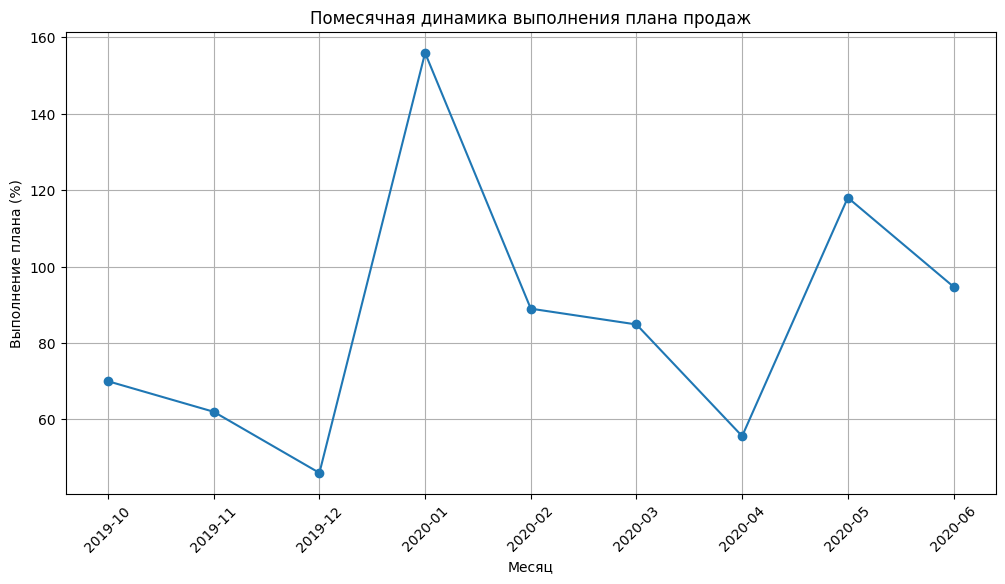

In [ ]:
data['Месяц'] = data['Дата сделки'].dt.to_period('M')

monthly_performance = data.groupby('Месяц').agg({
    'Продажи факт, тыс.руб': 'sum',
    'Продажи план, тыс.руб': 'sum'
}).reset_index()

monthly_performance['Выполнение плана (%)'] = (monthly_performance['Продажи факт, тыс.руб'] / monthly_performance['Продажи план, тыс.руб']) * 100


plt.figure(figsize=(12, 6))
plt.plot(monthly_performance['Месяц'].astype(str), monthly_performance['Выполнение плана (%)'], marker='o')
plt.title('Помесячная динамика выполнения плана продаж')
plt.xlabel('Месяц')
plt.ylabel('Выполнение плана (%)')
plt.xticks(rotation=45)
plt.grid()
plt.show()


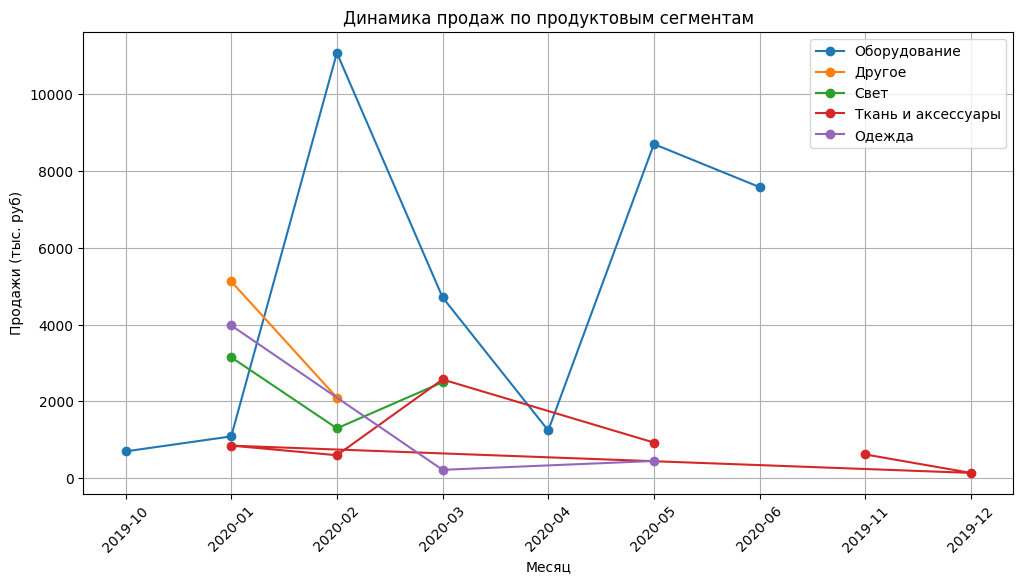

In [ ]:
segment_performance = data.groupby(['Месяц', 'Продуктовый сегмент']).agg({
    'Продажи факт, тыс.руб': 'sum'
}).reset_index()

# Выбор сегментов с наибольшими суммарными продажами
top_segments = segment_performance.groupby('Продуктовый сегмент')['Продажи факт, тыс.руб'].sum().nlargest(5).index
top_segments_performance = segment_performance[segment_performance['Продуктовый сегмент'].isin(top_segments)]

plt.figure(figsize=(12, 6))
for segment in top_segments:
    plt.plot(top_segments_performance[top_segments_performance['Продуктовый сегмент'] == segment]['Месяц'].astype(str),
             top_segments_performance[top_segments_performance['Продуктовый сегмент'] == segment]['Продажи факт, тыс.руб'],
             marker='o', label=segment)

plt.title('Динамика продаж по продуктовым сегментам')
plt.xlabel('Месяц')
plt.ylabel('Продажи (тыс. руб)')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


In [ ]:
zero_sales_segments = data.groupby('Продуктовый сегмент')['Продажи факт, тыс.руб'].sum()
inactive_segments = zero_sales_segments[zero_sales_segments == 0].index.tolist()
print("Сегменты с нулевыми продажами:", inactive_segments)


Сегменты с нулевыми продажами: []


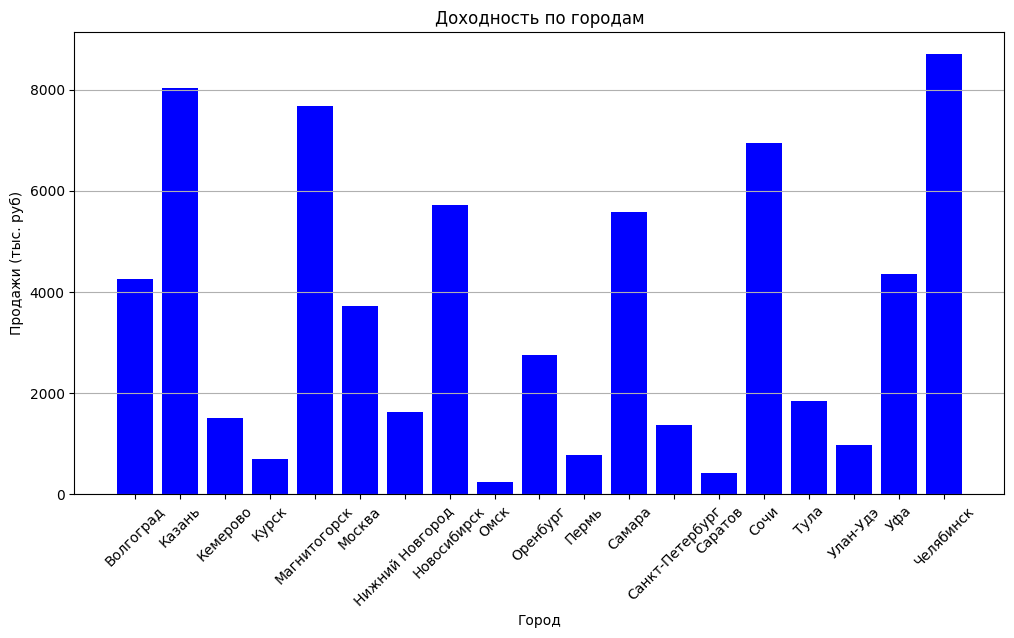

In [ ]:
city_performance = data.groupby('Город').agg({
    'Продажи факт, тыс.руб': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(city_performance['Город'], city_performance['Продажи факт, тыс.руб'], color='blue')
plt.title('Доходность по городам')
plt.xlabel('Город')
plt.ylabel('Продажи (тыс. руб)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


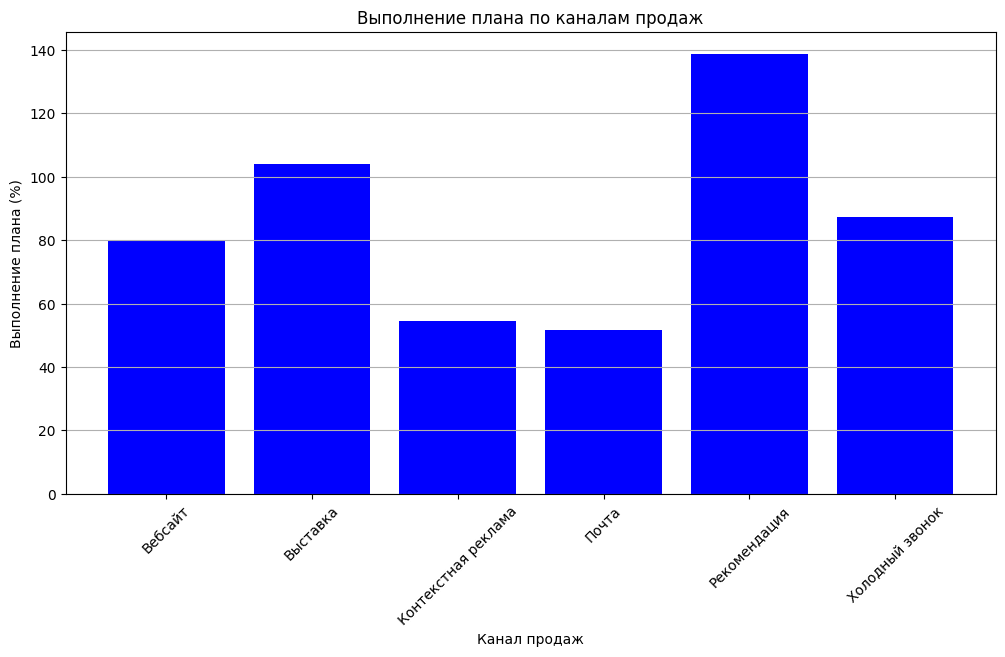

In [ ]:
channel_performance = data.groupby('Канал продаж').agg({
    'Продажи факт, тыс.руб': 'sum',
    'Продажи план, тыс.руб': 'sum'
}).reset_index()

channel_performance['Выполнение плана (%)'] = (channel_performance['Продажи факт, тыс.руб'] / channel_performance['Продажи план, тыс.руб']) * 100

plt.figure(figsize=(12, 6))
plt.bar(channel_performance['Канал продаж'], channel_performance['Выполнение плана (%)'], color='blue')
plt.title('Выполнение плана по каналам продаж')
plt.xlabel('Канал продаж')
plt.ylabel('Выполнение плана (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Выводы:

Были определены месяцы с высокими и низкими показателями выполнения плана, а также возможные сезонные колебания. Был посторен график с отображение продаж разлчных категорий товара.
Также были явлены сегменты с наибольшими продажами и те, которые перестали приносить какой-либо доход.
Затем был посторен график с данными о продажах в конкретных городах.
Последним был построен график с отображением выполнения плана по различным каналам.

# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

На основании проведенного исследовательского анализа можно сделать следующие выводы относительно профилирования менеджеров и расширения каналов продаж:

### 1. Профилирование менеджеров по товарным категориям и каналам продаж

- **Анализ выполнения плана по каналам продаж**: Если определенные каналы продаж демонстрируют высокие показатели выполнения плана, это может свидетельствовать о том, что менеджеры, работающие в этих каналах, обладают навыками и стратегиями, которые способствуют успешному закрытию сделок. Профилирование менеджеров по каналам, где они показывают лучшие результаты, может помочь выделить лучшие практики и применить их в менее успешных каналах.
  
- **Анализ по товарным категориям**: Если данные показывают, что некоторые менеджеры лучше справляются с определенными товарными категориями, это также может быть основанием для профилирования. Менеджеры, которые имеют опыт и успешные результаты в определенных категориях, могут быть назначены на аналогичные позиции или обучены коллег, чтобы повысить общие результаты команды.

**Рекомендация**: Да, стоит профилировать менеджеров по товарным категориям и каналам продаж. Это поможет выявить сильные стороны каждой команды и повысить общую эффективность продаж.

### 2. Расширение доходных каналов продаж и регионов с высоким спросом

- **Анализ регионов продаж**: Если определенные города или регионы показывают высокие показатели продаж, это указывает на наличие спроса. Расширение присутствия в этих регионах, например, через увеличение числа менеджеров или маркетинговые кампании, может привести к росту доходов.

- **Анализ каналов продаж**: Если определенные каналы продаж показывают высокие результаты, стоит рассмотреть возможность их расширения. Это может включать в себя увеличение инвестиций в маркетинг, обучение менеджеров, улучшение логистики и т.д.
